In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from tensorflow.keras.datasets.imdb import load_data as load_imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import StratifiedShuffleSplit

import pymc3 as pm

from modules.neural_networks import BayesianWordEmbedding

from modules.viz_utils import visulize_categorical_post, visulize_bernoulli_post, visualize_embedding

# Sentiment Classification With Words Embedding

In [38]:
(X_tr, y_tr), (X_ts, y_ts) = load_imdb(
    skip_top=100,
    num_words=4000,
    maxlen=90
)
X_tr = pad_sequences(X_tr, padding='post', value=2)
X_tr = X_tr[:, :20]
X_ts = pad_sequences(X_ts, padding='post', value=2)
X_ts = X_ts[:, :20]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different 

C:\Users\penthotal\miniconda3\envs\pr_test_env\lib\site-packages\pymc3\data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


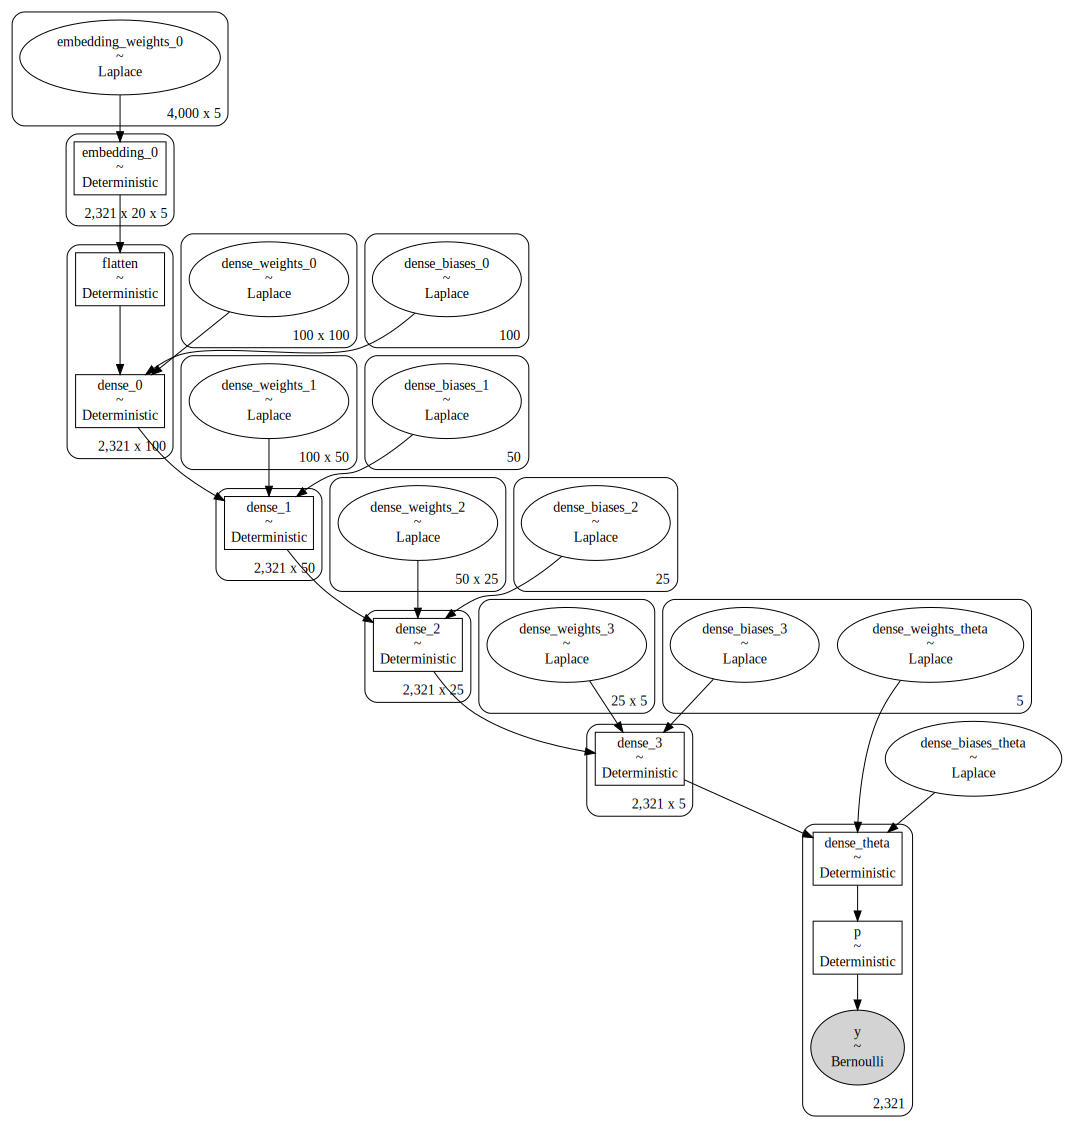

In [39]:
embedding_model = BayesianWordEmbedding(
    X=X_tr, 
    y=y_tr, 
    shape_out=1, 
    likelyhood_model='bernoulli_lk', 
    prior=pm.Laplace,
    vocabulary_size=int(X_tr.max()+1), 
    embedding_size=5, 
    layers=(100, 50, 25, 5),
    activation='tanh', 
    batch_size=32,
    mu=0,
    b=1
)
embedding_model.show_graph()

In [40]:
embedding_model.fit(n=100000)
embedding_trace = embedding_model.predict(
    X_ts, 
    y_ts, 
    ['embedding_weights_0', 'p']
)

Finished [100%]: Average Loss = 50.296


array([[<AxesSubplot:title={'center':'embedding_weights_0'}>,
        <AxesSubplot:title={'center':'embedding_weights_0'}>]],
      dtype=object)

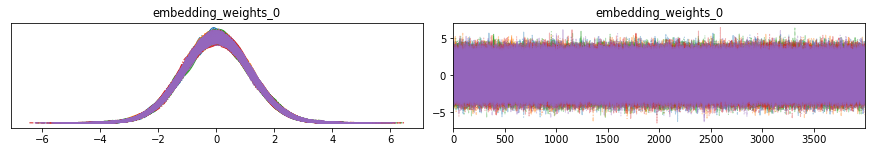

In [41]:
pm.plot_trace(embedding_trace, var_names=['embedding_weights_0'])

In [45]:
embedding_trace['p'].mean(0).min()

0.5695401854108998